In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# File path
file_path = '/mnt/data/Heart Attack.csv'

# Load dataset
print("Loading data...")
data = pd.read_csv("/content/Heart Attack.csv")
print(f"Data loaded. Shape: {data.shape}")

Loading data...
Data loaded. Shape: (1319, 9)


In [100]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [102]:
print(data.columns)

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')


In [103]:
# Data preprocessing
print("Preprocessing data...")
if data.isnull().sum().sum() > 0:
    print(f"Missing values found: {data.isnull().sum().sum()}, dropping missing values...")
    data = data.dropna()
else:
    print("No missing values found.")

print("Encoding labels...")
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

X = data.drop('class', axis=1)
y = data['class']

print("Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Preprocessing complete.")

Preprocessing data...
No missing values found.
Encoding labels...
Standardizing features...
Preprocessing complete.


In [104]:
# Splitting the data
print("Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split complete. Train size: {len(y_train)}, Test size: {len(y_test)}")

Splitting data into train and test sets...
Data split complete. Train size: 1055, Test size: 264


In [105]:
# Building and training the model
print("Building and training model...")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

Building and training model...
Model training complete.


In [106]:
# Evaluating the model
print("Evaluating model...")
y_pred = model.predict(X_test)

Evaluating model...


In [107]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[100   2]
 [  2 160]]



Visualizing confusion matrix...


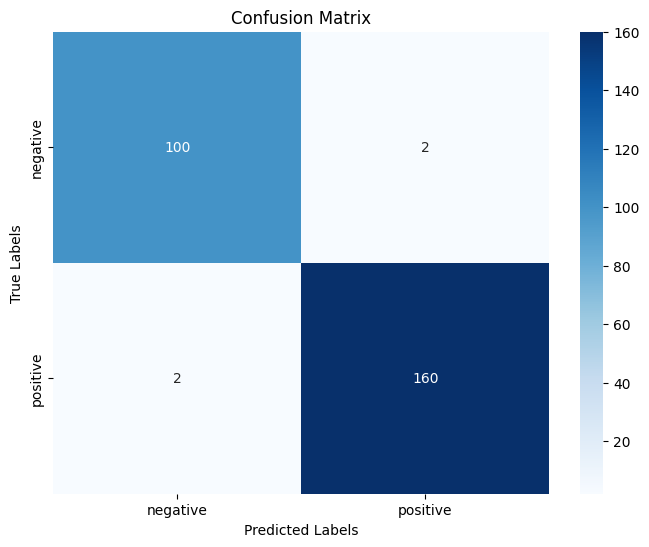

In [108]:
# Visualizing confusion matrix
print("\nVisualizing confusion matrix...")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=87)

# Model definitions
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=87),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=87),
    'SVM': SVC(probability=True, random_state=87),
    'Logistic Regression': LogisticRegression(random_state=87)
}

results = {}

In [110]:
# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Confusion Matrix': cm,
        'Classification Report': report
    }

    print(f"{name} Accuracy: {acc:.2f}")
    print(report)

KNN Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        97
           1       0.71      0.66      0.69       167

    accuracy                           0.61       264
   macro avg       0.59      0.60      0.59       264
weighted avg       0.62      0.61      0.62       264

Decision Tree Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.98      0.99      0.99       167

    accuracy                           0.98       264
   macro avg       0.99      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.99      0.99       167

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       2

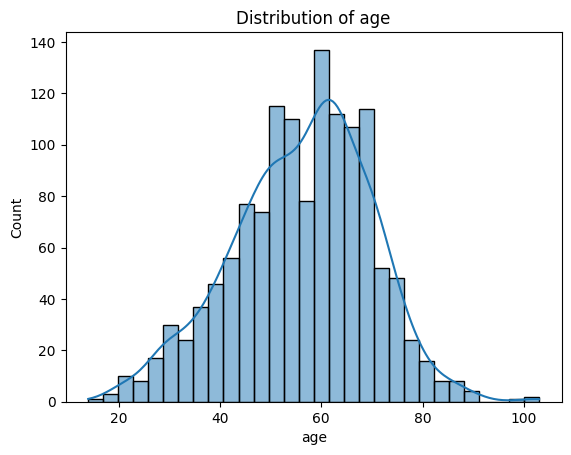

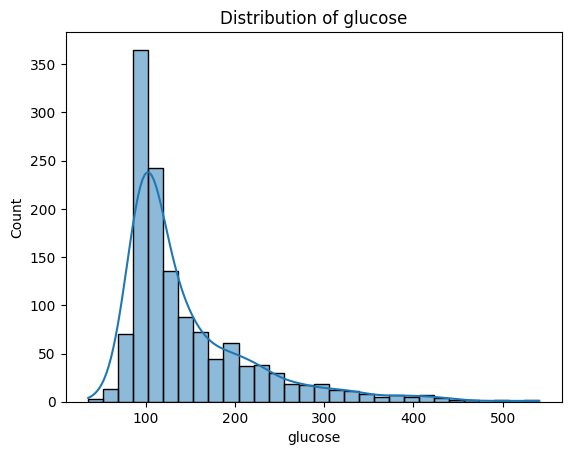

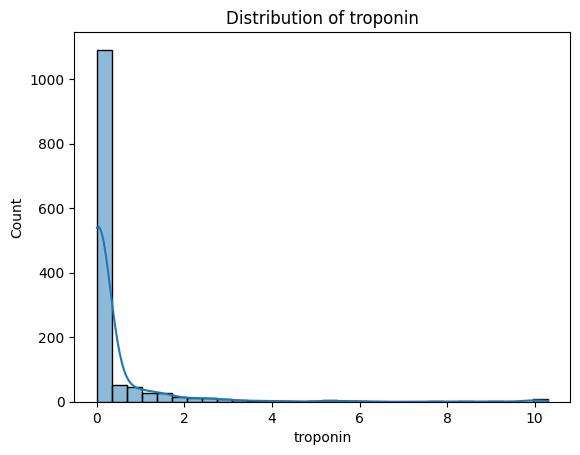

In [111]:
# Distribution of key features
for column in ['age', 'glucose', 'troponin']:
    plt.figure()
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

#Akurasi Akhir

In [112]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7537878787878788
